**Decision Trees: Predicting levels of acceptance to offered loans**

The following dataset is information about a bank's clients. Age, Income, Experience, Education are some of the variables included in the dataset. I want to use this data and build a simple model using a classification tree to see if we can accurately predict which clients accepted a personal loan offer. Hence the target variable in the dataframe is the "Personal Loan" column

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Load data
url = "https://raw.githubusercontent.com/carlosfalco/datapacks21-22/main/csvs/UniversalBank.csv"
bank_df = pd.read_csv(url)
pd.set_option("display.max_columns", None)

# Clean data, remove data we will not use (like zip code)
bank_df.drop(bank_df.columns[0], axis=1, inplace=True)
bank_df.drop(bank_df.columns[3], axis=1, inplace=True)

bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [15]:
# Partition the data - separate "Personal Loan" column
X = pd.DataFrame(
    columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
              'CD Account', 'Online', 'CreditCard'], data=bank_df)
y = pd.DataFrame(columns=['Personal Loan'], data=bank_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

**Question**: How many of the cases in the training partition represented people who did/didn't accept offers of a personal loan?

In [16]:
train_loan_count = y_train['Personal Loan'].value_counts()
print(train_loan_count)

0    3164
1     336
Name: Personal Loan, dtype: int64


So 3,164 clients did not accept offers of a pesonal loan, and 336 did.

Now I want to fit the DT model to our train data to see some of the results:

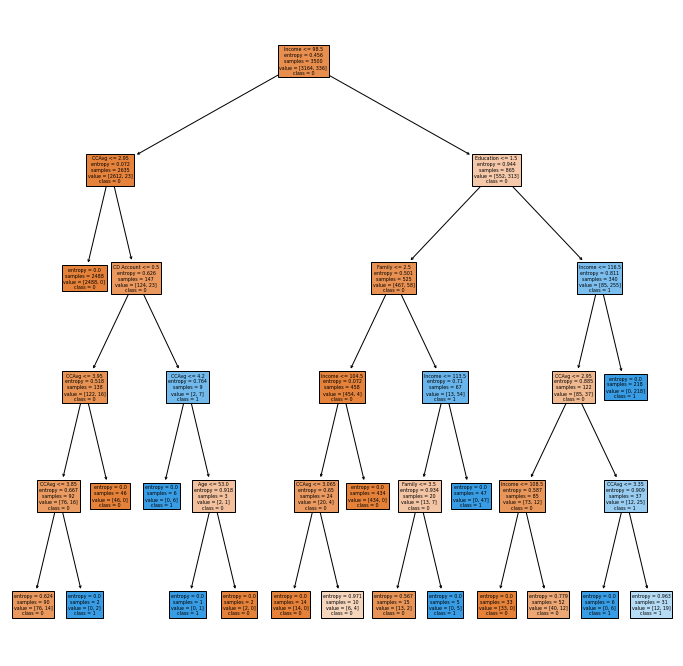

In [17]:
# Plotting the classification tree
dt_loan = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=2020)
dt_loan.fit(X_train, y_train)
plt.figure(figsize=(12,12))
class_n = list(map(str, dt_loan.classes_.tolist()))
ccTree = tree.plot_tree(dt_loan, feature_names=X.columns, class_names=class_n, filled=True)
plt.show()

y_pred = dt_loan.predict(X_test)

Confusion matrix
[[1352    4]
 [  11  133]]


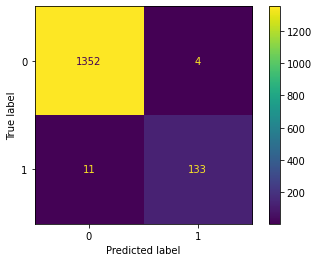

In [18]:
# Plotting a confusion matrix 
cf = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix" )
print(cf)
cfd = ConfusionMatrixDisplay(confusion_matrix=cf)
cfd.plot()
plt.show()

Plotting the confusion matrix, we can see how the model panned out.
It classified 11 acceptors as non-acceptors, and 4 non-acceptors as acceptors. But on the whole, it was pretty accurate!!

In [19]:
print("Training partition accuracy: " , dt_loan.score(X_train, y_train))

print("Test partition accuracy: ", dt_loan.score(X_test, y_test))

Training partition accuracy:  0.9874285714285714
Test partition accuracy:  0.99
